In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [3]:
import numpy as np

from lint.models import Bucket

In [4]:
series = Bucket.token_series('theoretical')
series.sum()

3166.0

In [40]:
def plot_series(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    plt.figure(figsize=(w, h))
    plt.plot(series)
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

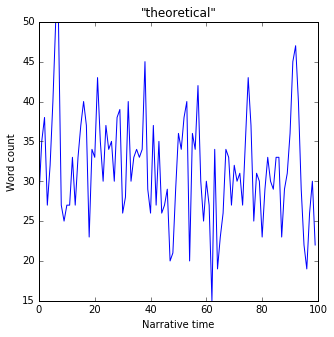

In [41]:
plot_series('theoretical')

In [42]:
def plot_series_expected(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)
    
    plt.figure(figsize=(w, h))
    
    plt.axhline(expected, color='black')
    plt.plot(series)
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

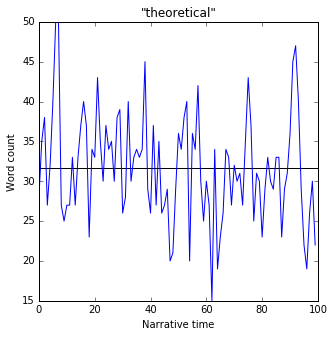

In [43]:
plot_series_expected('theoretical')

In [54]:
def plot_sample(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))
    
    plt.axhline(expected, color='black')
    plt.plot(bs[0])
    
    plt.title('"{}", random permutation'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

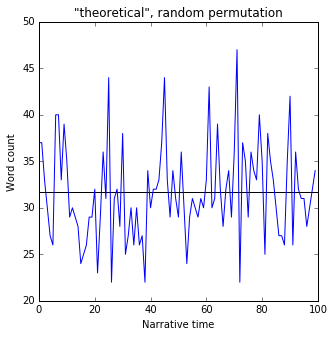

In [57]:
plot_sample('theoretical')

In [38]:
def plot_bootstrap(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    print(token, zscores.mean())
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

theoretical 0.958250919205


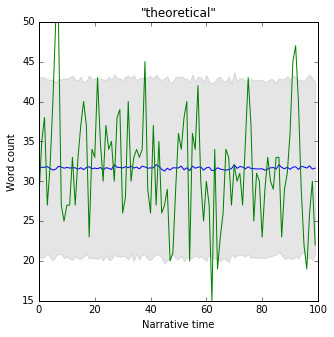

In [71]:
plot_bootstrap('theoretical')

death 10.0316382332


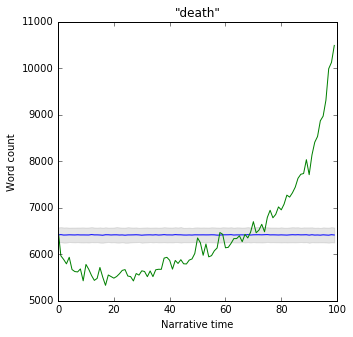

In [72]:
plot_bootstrap('death')

In [75]:
def mean_zscore(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    return zscores.mean()

In [76]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [80]:
import re

data = []
for i, (token, count) in enumerate(tokens.items()):
    
    score = mean_zscore(token)
    
    if re.match('[a-z]+', token):
        data.append((token, count, score))
        
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [81]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'score'))

df.sort_values('score', ascending=False, inplace=True)

In [82]:
pd.set_option('display.max_rows', 1000)

df.head(500)

,token,count,score
4,a,45684348,22.334404
11,you,23542825,20.366492
5,i,36733423,18.411933
0,the,112947793,15.529198
3,of,51452477,14.458283
160,young,1549495,14.429100
212,years,1169616,14.000694
31,me,8766124,13.674897
26,him,10476264,13.074499
513,school,396117,12.974736


In [28]:
def plot_group(*tokens, w=5, h=5):
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token in tokens:
        
        series = Bucket.token_series(token)
        line, = plt.plot(series/series.sum(), label=token)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Normalized frequency')
    plt.show()

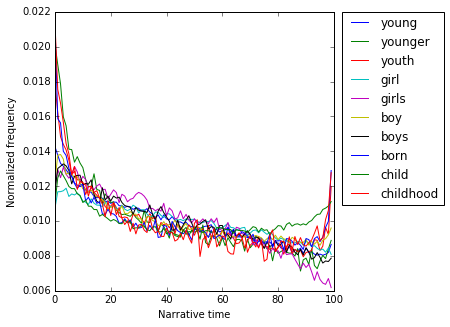

In [29]:
plot_group(
    'young',
    'younger',
    'youth',
    'girl',
    'girls',
    'boy',
    'boys',
    'born',
    'child',
    'childhood',
)

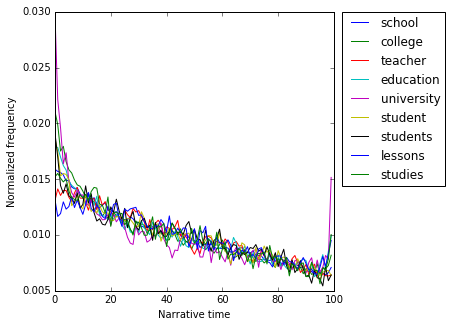

In [13]:
plot_group(
    'school',
    'college', 
    'teacher', 
    'education',
    'university',
    'student',
    'students',
    'lessons',
    'studies',
)

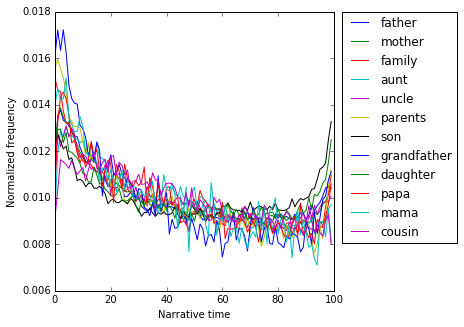

In [14]:
plot_group(
    'father',
    'mother',
    'family',
    'aunt',
    'uncle',
    'parents',
    'son',
    'grandfather',
    'daughter',
    'papa',
    'mama',
    'cousin',
)

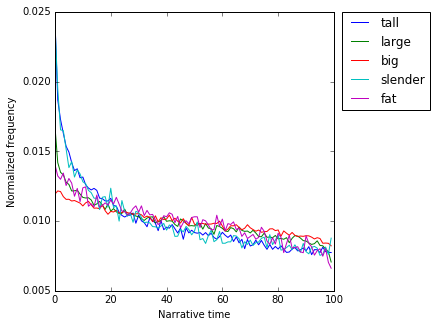

In [15]:
plot_group(
    'tall',
    'large',
    'big',
    'slender',
    'fat',
)

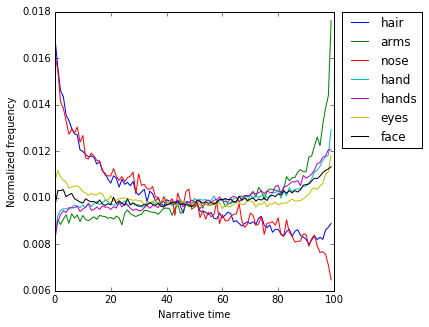

In [16]:
plot_group(
    'hair',
    'arms',
    'nose',
    'hand',
    'hands',
    'eyes',
    'face',
)

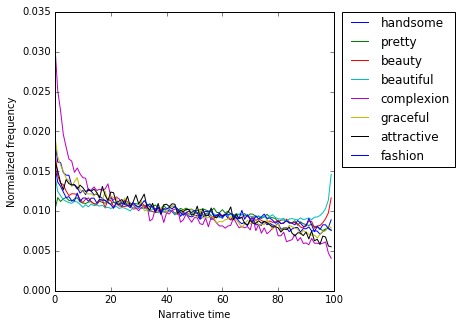

In [17]:
plot_group(
    'handsome',
    'pretty',
    'beauty',
    'beautiful',
    'complexion',
    'graceful',
    'attractive',
    'fashion',
)

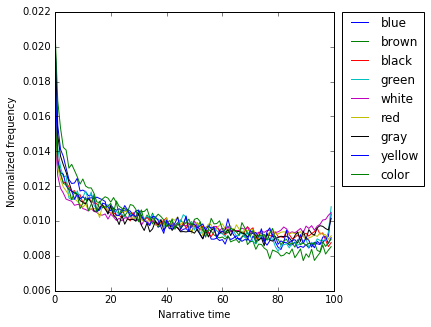

In [18]:
plot_group(
    'blue',
    'brown',
    'black',
    'green',
    'white',
    'red',
    'gray',
    'yellow',
    'color',
)

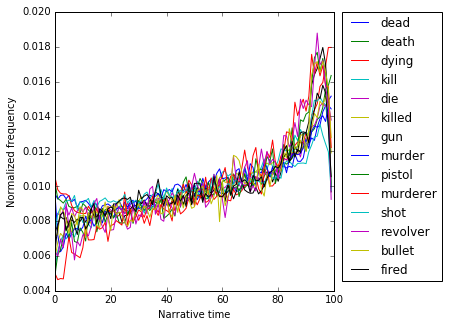

In [19]:
plot_group(
    'dead',
    'death',
    'dying',
    'kill',
    'die',
    'killed',
    'gun',
    'murder',
    'pistol',
    'murderer',
    'shot',
    'revolver',
    'bullet',
    'fired',
)

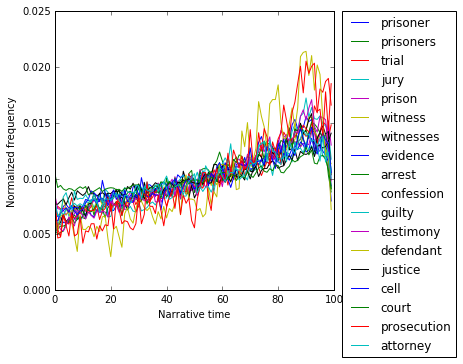

In [20]:
plot_group(
    'prisoner',
    'prisoners',
    'trial',
    'jury',
    'prison',
    'witness',
    'witnesses',
    'evidence',
    'arrest',
    'confession',
    'guilty',
    'testimony',
    'defendant',
    'justice',
    'cell',
    'court',
    'prosecution',
    'attorney',
)

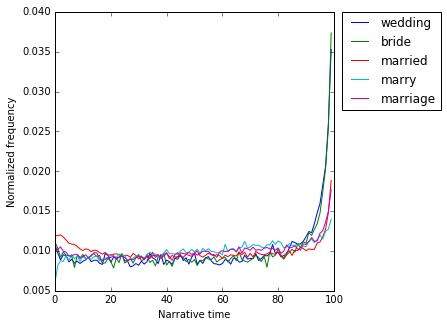

In [21]:
plot_group(
    'wedding',
    'bride',
    'married',
    'marry',
    'marriage',
)

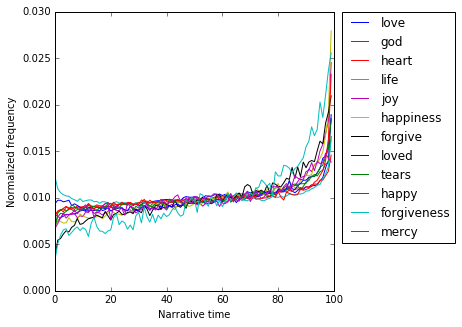

In [22]:
plot_group(
    'love',
    'god',
    'heart',
    'life',
    'joy',
    'happiness',
    'forgive',
    'loved',
    'tears',
    'happy',
    'forgiveness',
    'mercy',
)

a 22.3981832103


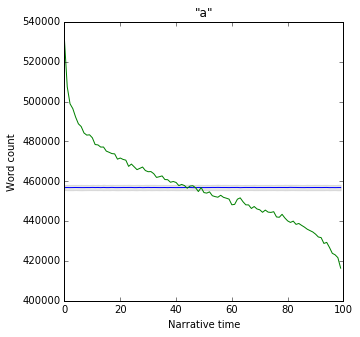

In [125]:
plot_bootstrap('a')

the 15.4661619889


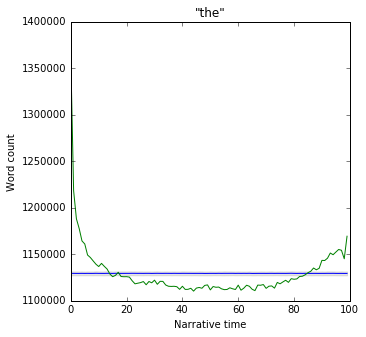

In [126]:
plot_bootstrap('the')

“ 17.7768956385


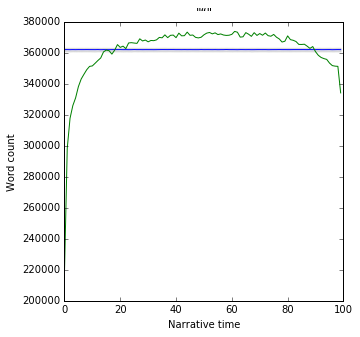

In [128]:
plot_bootstrap('“')

said 9.93401695794


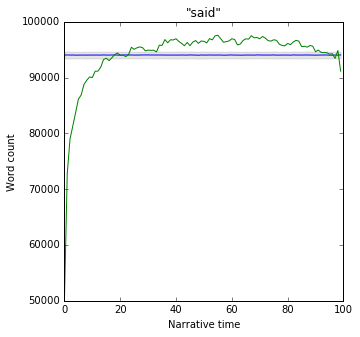

In [129]:
plot_bootstrap('said')

think 7.29368646012


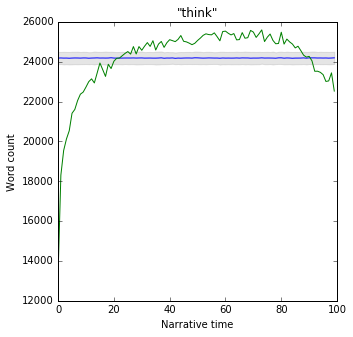

In [130]:
plot_bootstrap('think')

her 5.90788971677


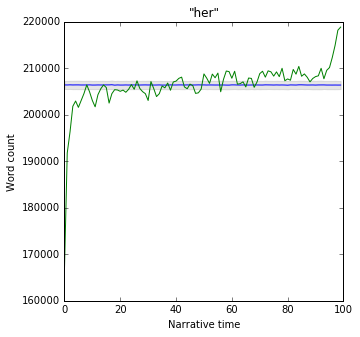

In [131]:
plot_bootstrap('her')

him 13.0867488383


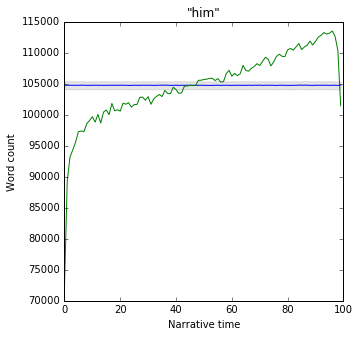

In [132]:
plot_bootstrap('him')

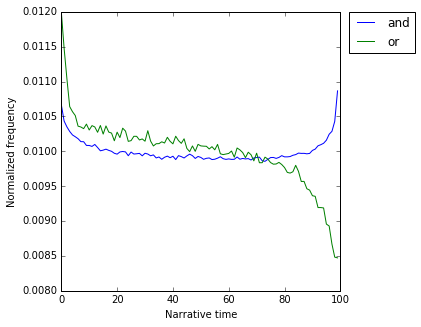

In [23]:
plot_group('and', 'or')

In [34]:
def plot_pos_bootstrap(*pos, w=5, h=5):
    
    series = Bucket.pos_series(*pos)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])
    
    plt.title(', '.join(pos))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

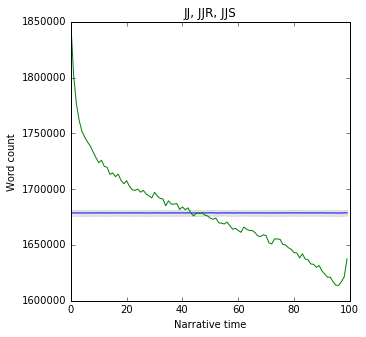

In [35]:
plot_pos_bootstrap('JJ', 'JJR', 'JJS')

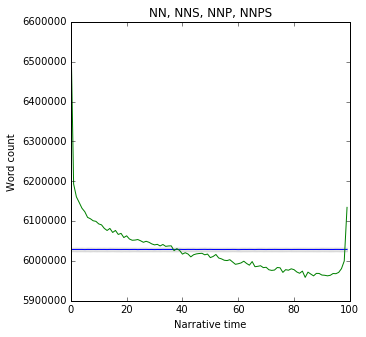

In [36]:
plot_pos_bootstrap('NN', 'NNS', 'NNP', 'NNPS')

marriage 3.26237473478


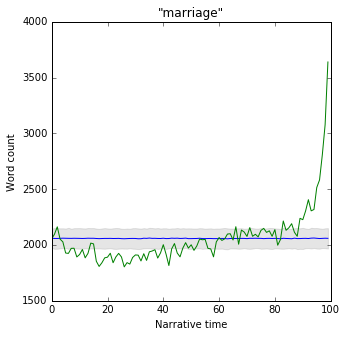

In [39]:
plot_bootstrap('marriage')